# Machine Learning as a Service

This is a starter example to illustrate all the steps in building an ML service. 

We will predict the probability of loan default given two variables - age and income. 

## Simple Example

In [1]:
#Load the libraries and configuration
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.externals import joblib
from firefly.client import Client

### ** Frame -  find probability of default **

In [2]:
# Predict `default` probability

### ** Acquire - load historical data **

In [3]:
df = pd.read_csv("../data/historical_loan.csv") 

### **Refine - drop NAs**


In [4]:
df.dropna(axis=0, inplace=True) 

### ** Transform - log scale **

In [5]:
df['log_age'] = np.log(df.age)
df['log_income'] = np.log(df.income)

### ** Explore - age, income & default **

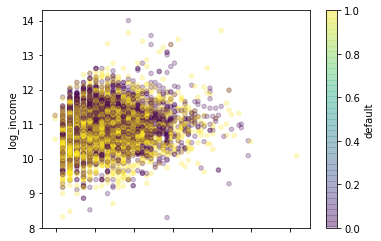

In [6]:
df.plot.scatter(x='log_age', y='log_income', c='default', alpha=0.25, cmap='viridis')

### ** Model - Build a tree classifier **

In [7]:
X = df.loc[:,('age', 'income')]
y = df.loc[:,'default']
clf = tree.DecisionTreeClassifier(max_depth=10).fit(X,y)
joblib.dump(clf, "clf.pkl")

['clf.pkl']

### ** Build - the ML API **

In [8]:
%%file simple.py
import numpy as np
from sklearn.externals import joblib
model = joblib.load("clf.pkl")

def predict(age, amount):
    features = [age, amount]
    prob0, prob1 = model.predict_proba([features])[0]
    return prob1

Overwriting simple.py


### ** Deploy - the ML API **

Run the following command in your terminal 

     cd credit-risk/notebooks/
     firefly simple.predict

### ** Interact - get prediction using API**

In [19]:
simple = Client("http://127.0.0.1:8000")
simple.predict(age=28, amount=10000)

0.5373423860329777